## OpenCV - Introduction

In [1]:
import cv2 as cv

In [99]:
image = cv.imread(r"D:\PYTHON_Programmes\Python_Projects\2105800_ML_Projects\Image_Classification_Projects\catsAndDogs40\train\dog\4.jpg", 1)
print("Datatype of this image = ",image.dtype)

Datatype of this image =  uint8


### Viewing Image imported by OpenCV

To view an image in jupyter notebook which is imported by OpenCV library, we will be needing a GUI (Graphical User Interface) window. The 'imshow' function is used to create a GUI and display the image. 
The first parameter inside the 'imshow' is the name of the GUI Window and is followed by the name of the variable which stores the image, which in this case is 'image' itself.

However, while closing the GUI window, the user may get stuck with the window and the window may not provide with an option to close. Hence, we use a new function, i.e., 'waitKey(0)'. Here, the '0' specified inside the wait key is to keep the window open untill the user requires it.

The 'if' function with respect to variable 'k' is used to assign a key which when pressed will close the GUI window. Here, 'k==27' checks for the 'Esc' button being pressed on the keyboard and 'k==ord('q')' checks for the 'q' button being pressed on the keyboard.

In [10]:
cv.imshow("Image1", image)
k = cv.waitKey(0)
if k==27 or k==ord('q'):
    cv.destroyAllWindows()

### Converting the image to GrayScale using OpenCV

In [11]:
gray_image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)

Here, 'cvtColor()' is a method which allows us to change the color format of images. A colored image has 3 dimensions and the third dimension has mainly 3 parts. If we were using matplotlib library, the order of interpretation of the 3rd dimension of the image will be R-Red, G-Green and B-Blue. However, for OpenCV, the order of image interpretation is B-Blue, G-Green and R-Red.
That is why the command 'cv.COLOR_BGR2GRAY' exists.

In [97]:
cv.imwrite(r"D:\PYTHON_Programmes\Python_Projects\2105800_ML_Projects\Image_Classification_Projects\13_gray.jpg", gray_image)

True

### Image Processing

Image processing handling pixels in a desired manner to achieve what is required for the image. Most of the common operations performed on a digital image include filtering, enhancement, restoration, etc.

Filtering - It is a process of eliminating unwanted noise from an image. It is achieved by applying a filter which adjusts the pixel values of the image. There are various types of filters which are used for various purposes. Filters can be designed to remove specific type of noises, like Gaussian Noise, Speckle Noise or salt-and-pepper noise. The filters used to remove these noises are Gaussian filter, median filter and mean filter. 

Contrast Enhancement: Contrast enhancement techniques aim to increase the contrast of an image, making it easier to distinguish between different image features. These techniques can be helpful in applications such as medical imaging and surveillance. Some standard contrast enhancement techniques include histogram equalization, adaptive histogram equalization, and contrast stretching.

Segmentation: Segmentation techniques are used to divide an image into regions based on its content. Segmentation can be helpful in applications such as medical imaging, where specific structures or organs must be isolated from the image. Some standard segmentation techniques include thresholding, edge detection, and region growing.

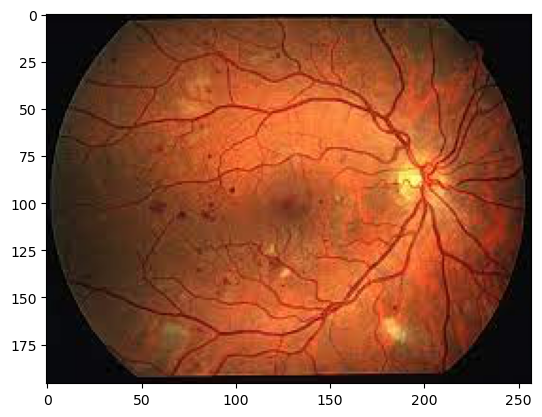

In [115]:
import matplotlib.pyplot as plt
retina_img = plt.imread(r"D:\PYTHON_Programmes\Python_Projects\2105800_ML_Projects\Image_Classification_Projects\DR_Dataset\7.jpeg", 1)
plt.imshow(retina_img)

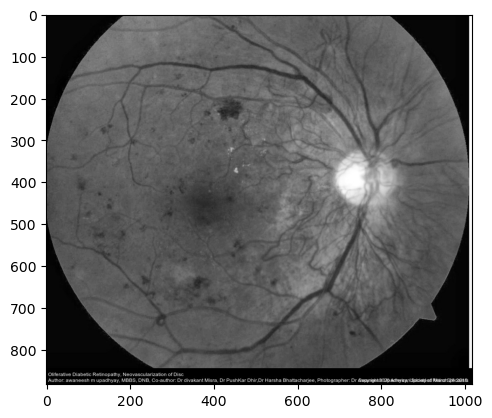

In [23]:
gray_retina_img = cv.cvtColor(retina_img, cv.COLOR_BGR2GRAY)
plt.imshow(gray_retina_img, cmap='gray')
# cv.imshow("Image2", gray_retina_img)
# k = cv.waitKey(0)
# if k==27 or k==ord('q'):
#     cv.destroyAllWindows()

### Binary Thresholding:

80.0


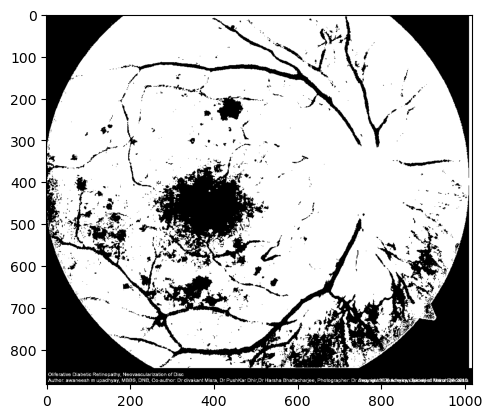

In [134]:
ret, thresh1 = cv.threshold(gray_retina_img, 80, 255, cv.THRESH_BINARY)
plt.imshow(thresh1, cmap='gray')
print(ret)
plt.savefig(r"D:\PYTHON_Programmes\Python_Projects\2105800_ML_Projects\Image_Classification_Projects\Binary_Thresh1.jpg")

### Otsu's Thresholding Method:
In this thresholding method, we do not specify the threshold value for mapping values for black and white. Instead, it uses a histogram to estimate which threshold will work the best for the given image. Hence, this method is more useful.

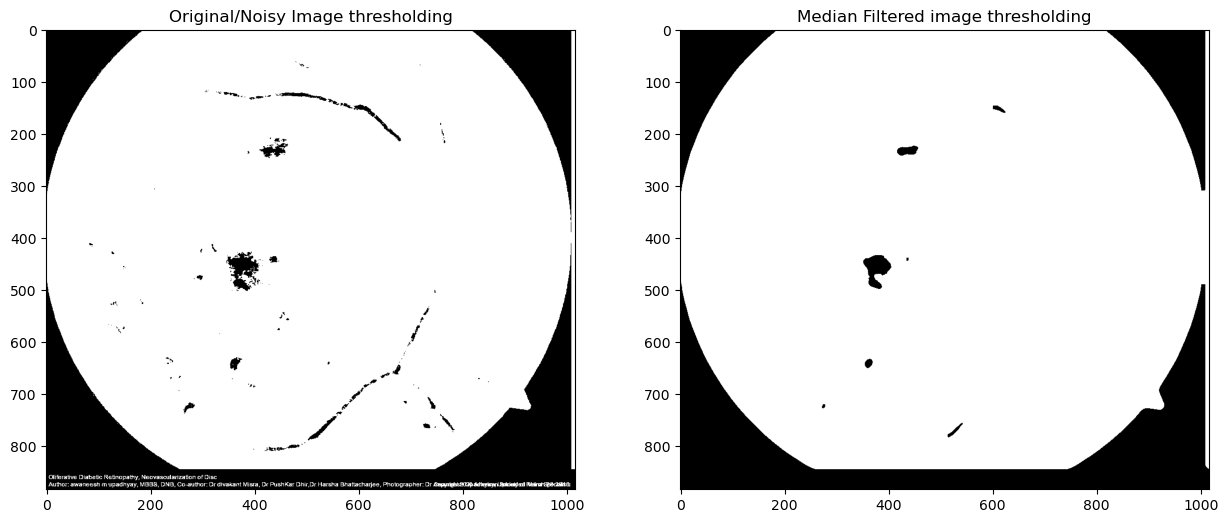

In [135]:
ret, thresh2_1 = cv.threshold(gray_retina_img, 0, 255, cv.THRESH_BINARY+cv.THRESH_OTSU)
ret, thresh2_2 = cv.threshold(median, 0, 255, cv.THRESH_BINARY+cv.THRESH_OTSU)
plt.figure(figsize=(15,15))
plt.subplot(121)
plt.imshow(thresh2_1, cmap='gray')
plt.title("Original/Noisy Image thresholding")
plt.subplot(122)
plt.imshow(thresh2_2, cmap='gray')
plt.title("Median Filtered image thresholding")
ret
plt.savefig(r"D:\PYTHON_Programmes\Python_Projects\2105800_ML_Projects\Image_Classification_Projects\Otsu_Thresh1.jpg")

### Noise Reduction:
The nature of the noise should be known if a noise filter is to be applied. Here, median and gaussian filter is applied.

Text(0.5, 1.0, 'After Median Filter')

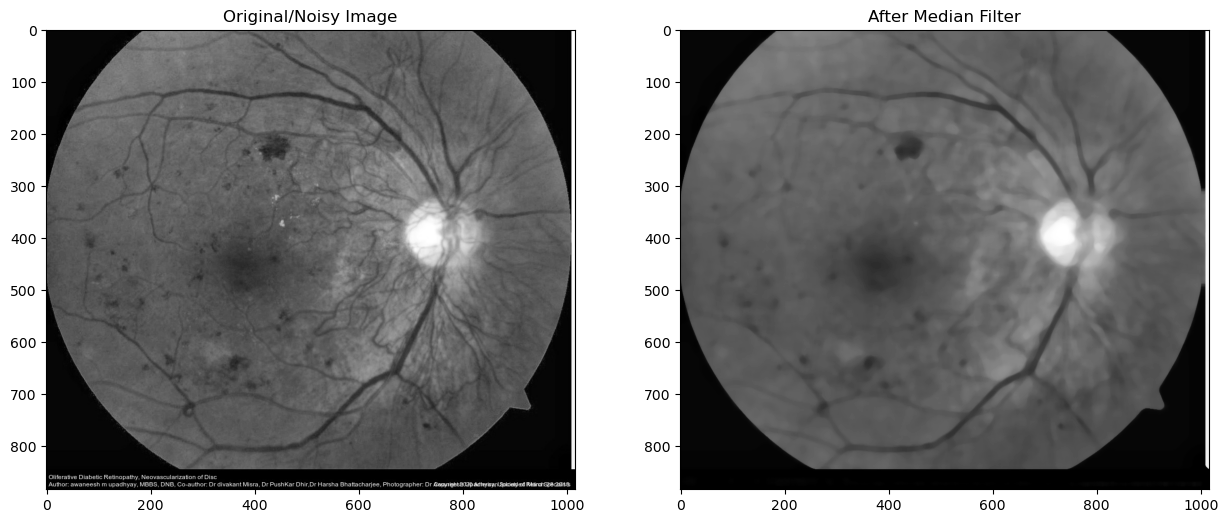

In [43]:
img = cv.cvtColor(retina_img, cv.COLOR_BGR2GRAY)
median = cv.medianBlur(img, 15)
plt.figure(figsize=(15,15))
plt.subplot(121)
plt.imshow(img, cmap='gray')
plt.title("Original/Noisy Image")
plt.subplot(122)
plt.imshow(median, cmap='gray')
plt.title("After Median Filter")

Text(0.5, 1.0, 'After Median Filter')

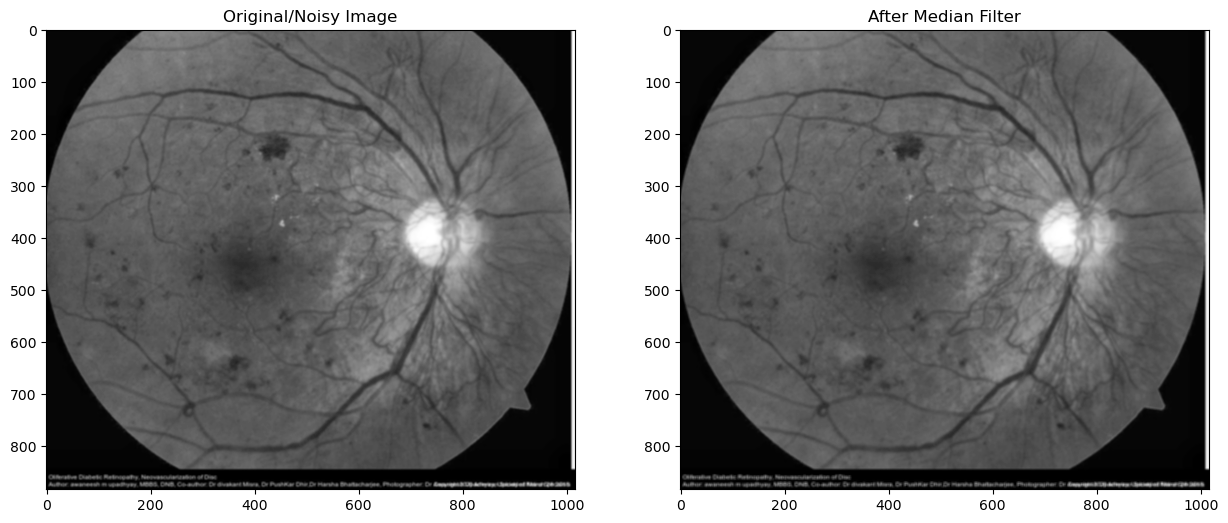

In [46]:
gaussian_blurr1 = cv.GaussianBlur(gray_retina_img, (5,5), 2, cv.BORDER_DEFAULT)
gaussian_blurr2 = cv.GaussianBlur(gray_retina_img, (5,5), 7, cv.BORDER_DEFAULT)

plt.figure(figsize=(15,15))
plt.subplot(121)
plt.imshow(gaussian_blurr1, cmap='gray')
plt.title("Original/Noisy Image")
plt.subplot(122)
plt.imshow(gaussian_blurr2, cmap='gray')
plt.title("After Median Filter")

### Canny Edge Detection:
It is an edge detection technique which depends on the 'Sobel' filter. It essentially works by calculating the image intensity gradient at each pixel in the image. Since the gradient value will be maximum at pixels where the color changes very quickly in cases of edges.

The input image is made to go through 5 processes.

1) **Image Smoothening** involves converted to grayscale images first. This is because edge detection does not depend on colors. Then, the noise present in the image is removed with the help of the Gaussian Filter since edge detection is much prone to noise.
2) **Sobel Filter** is used to identify/detect the edges of the image.
3) **Non-Max Supression** is performed where the local maximum pixel in the gradients are retained and the rest values are suppressed.
4) **Applying Threshold** to remove pixels below a certain threshold (done to remove edges formed due to noise in the image).
5) **Hysterisis Tracking** to make a pixel strong if any of the neighbouring pixels are string.

Text(0.5, 1.0, 'With Canny Edge Detection')

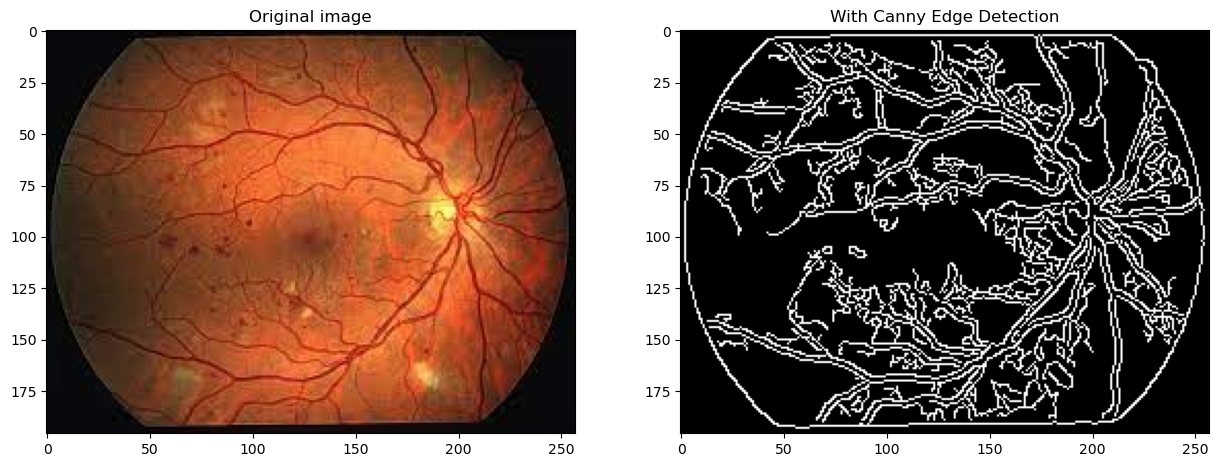

In [130]:
gray_retina = cv.cvtColor(retina_img, cv.COLOR_BGR2GRAY)
gray_retina_blur = cv.GaussianBlur(gray_retina, (5,5), 0)
canny = cv.Canny(gray_retina_blur, 0, 100) # To get the best possible values for a Canny Edge Detection, we use the Histogram Analysis method to detect 2 peak values and then use those values in the Canny method.
# cv.imshow("Canny Edge Detection", canny)
# k = cv.waitKey(0)
# if k==27 or k==ord('q'):
#     cv.destroyAllWindows()
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(15,10))
ax1.imshow(retina_img)
ax1.set_title("Original image")
ax2.imshow(canny, cmap='gray')
ax2.set_title("With Canny Edge Detection")
